In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:/DataSets/911_calls.csv')

## Data Cleaning and Preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# converting the timeStamp column to pandas datetime dtype instead of the initial object dtype
data.timeStamp = pd.to_datetime(data.timeStamp)

In [6]:
# filling the NaN in the timeStamp column with the previous time before the NaN
data.timeStamp.fillna(method = 'ffill')

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [7]:
data.dropna(how = 'any', inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        86576 non-null  float64       
 1   lng        86576 non-null  float64       
 2   desc       86576 non-null  object        
 3   zip        86576 non-null  float64       
 4   title      86576 non-null  object        
 5   timeStamp  86576 non-null  datetime64[ns]
 6   twp        86576 non-null  object        
 7   addr       86576 non-null  object        
 8   e          86576 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.6+ MB


The lng, lat and zip column is more of an object dtype rather than the float dtype because they talk about location and therefore cannot be used for mathematical calculations. It is advisable to convert them to object dtype.

In [9]:
data.lng = data.lng.astype('object')

In [10]:
data.lat = data.lat.astype('object')

In [11]:
data.zip = data.zip.astype('object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        86576 non-null  object        
 1   lng        86576 non-null  object        
 2   desc       86576 non-null  object        
 3   zip        86576 non-null  object        
 4   title      86576 non-null  object        
 5   timeStamp  86576 non-null  datetime64[ns]
 6   twp        86576 non-null  object        
 7   addr       86576 non-null  object        
 8   e          86576 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 6.6+ MB


In [13]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.26468,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1


In [14]:
# Grouping the emergency calls by the title
title = data.groupby('title').sum()
sorted_title = title.e.sort_values(ascending = False)
sorted_title = pd.DataFrame(sorted_title)

In [15]:
sorted_title['Percentage'] = (sorted_title.e/sorted_title.e.sum())*100
sorted_title

,e,Percentage
title,,
Traffic: VEHICLE ACCIDENT -,19525,22.552439
Traffic: DISABLED VEHICLE -,5764,6.657734
Fire: FIRE ALARM,5134,5.930050
EMS: RESPIRATORY EMERGENCY,4810,5.555812
EMS: CARDIAC EMERGENCY,4686,5.412585
...,...,...
EMS: DEBRIS/FLUIDS ON HIGHWAY,1,0.001155
EMS: PLANE CRASH,1,0.001155
Fire: UNCONSCIOUS SUBJECT,1,0.001155


In [16]:
title.describe()

,e
count,107.000000
mean,809.121495
std,2155.384043
min,1.000000
25%,12.000000
50%,91.000000
75%,758.500000
max,19525.000000


In [17]:
# Grouping the emergency calls by the address
addr = data.groupby('addr').sum()
sorted_addr = addr.e.sort_values(ascending = False)
sorted_addr = pd.DataFrame(sorted_addr)

In [18]:
sorted_addr['Percentage'] = (sorted_addr.e/sorted_addr.e.sum())*100
sorted_addr

,e,Percentage
addr,,
SHANNONDELL DR & SHANNONDELL BLVD,938,1.083441
MAIN ST & OLD SUMNEYTOWN PIKE,390,0.450471
THE FAIRWAY & RYDAL RD,260,0.300314
GULPH RD & KIRK AVE,235,0.271438
EVERGREEN RD & W LIGHTCAP RD,232,0.267973
...,...,...
MEADOW LN,1,0.001155
MEADOW LN & COLONIAL DR,1,0.001155
MEADOW LN & RED BARN LN,1,0.001155


In [19]:
addr.describe()

,e
count,19759.000000
mean,4.381598
std,12.410438
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,938.000000


In [20]:
# Grouping the emergency calls by the twp
twp = data.groupby('twp').sum()
sorted_twp = twp.e.sort_values(ascending = False)
sorted_twp = pd.DataFrame(sorted_twp)

In [21]:
sorted_twp['Percentage'] = (sorted_twp.e/sorted_twp.e.sum())*100
sorted_twp

,e,Percentage
twp,,
LOWER MERION,7202,8.318703
ABINGTON,5675,6.554934
NORRISTOWN,5610,6.479856
POTTSTOWN,4029,4.653715
CHELTENHAM,3942,4.553225
...,...,...
BRYN ATHYN,161,0.185964
SALFORD,156,0.180189
GREEN LANE,50,0.057753


In [22]:
twp.describe()

,e
count,67.000000
mean,1292.179104
std,1464.944181
min,21.000000
25%,295.000000
50%,583.000000
75%,1787.000000
max,7202.000000


In [23]:
# Grouping the emergency calls by the zip code
Zip = data.groupby('zip').sum()
sorted_Zip = Zip.e.sort_values(ascending = False)
sorted_Zip = pd.DataFrame(sorted_Zip)

In [24]:
sorted_Zip['Percentage'] = (sorted_Zip.e/sorted_Zip.e.sum())*100
sorted_Zip

,e,Percentage
zip,,
19401.0,6977,8.058815
19464.0,6641,7.670717
19403.0,4854,5.606635
19446.0,4745,5.480734
19406.0,3173,3.664988
...,...,...
19119.0,1,0.001155
19107.0,1,0.001155
19082.0,1,0.001155


In [25]:
Zip.describe()

,e
count,102.000000
mean,848.784314
std,1337.635120
min,1.000000
25%,21.500000
50%,295.000000
75%,1109.750000
max,6977.000000


### Bar chart showing the call frequency regarding the title of the emergency

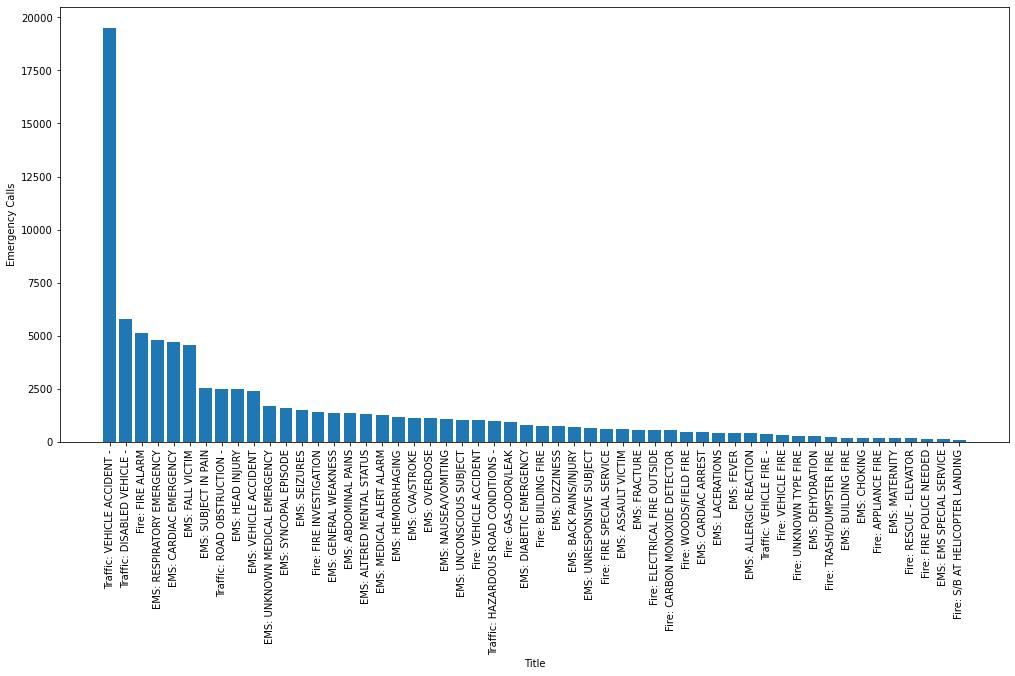

In [26]:
plt.figure(figsize = (17,8));
plt.bar(sorted_title[:54].index, sorted_title[:54].e);
plt.xticks(rotation = 90);
plt.xlabel('Title');
plt.ylabel('Emergency Calls');

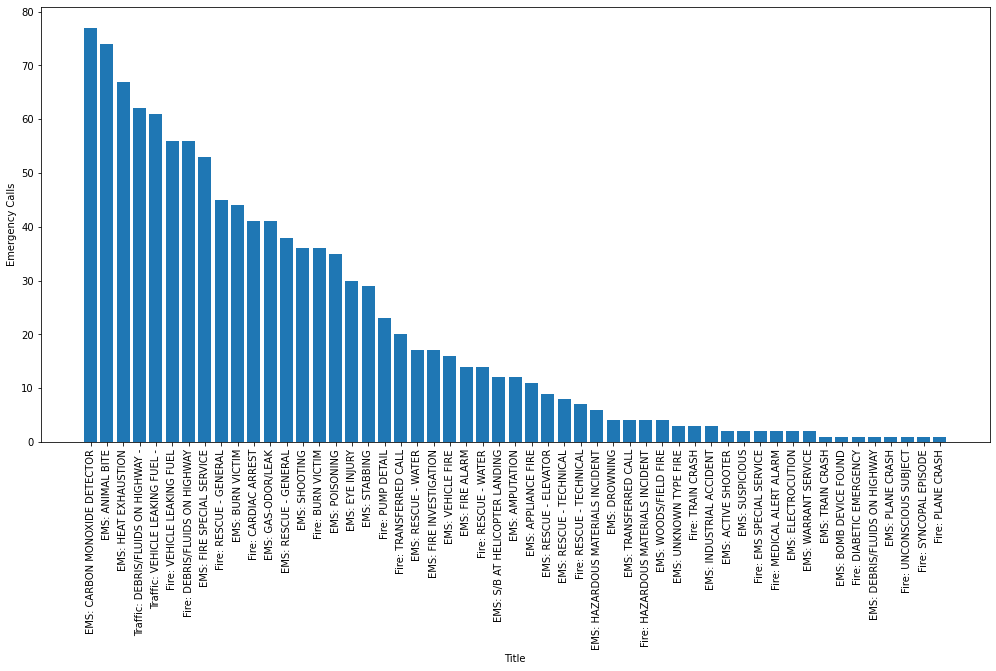

In [27]:
plt.figure(figsize = (17,8))
plt.bar(sorted_title[54:108].index, sorted_title[54:108].e);
plt.xticks(rotation = 90);
plt.xlabel('Title');
plt.ylabel('Emergency Calls');

### Bar chart showing the call frequency with respect to the twp

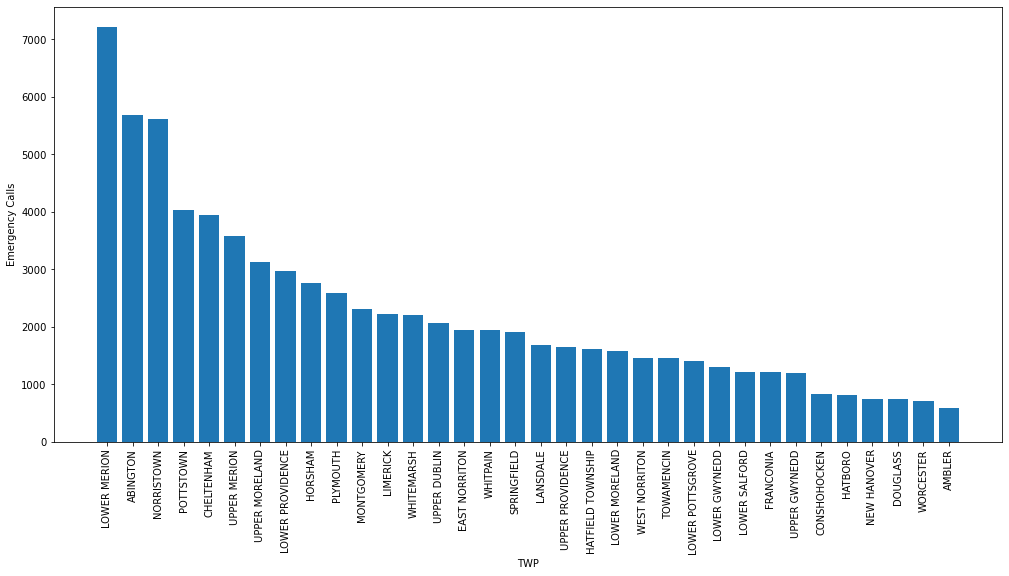

In [28]:
plt.figure(figsize = (17,8))
plt.bar(sorted_twp[:34].index, sorted_twp[:34].e);
plt.xticks(rotation = 90);
plt.xlabel('TWP');
plt.ylabel('Emergency Calls');

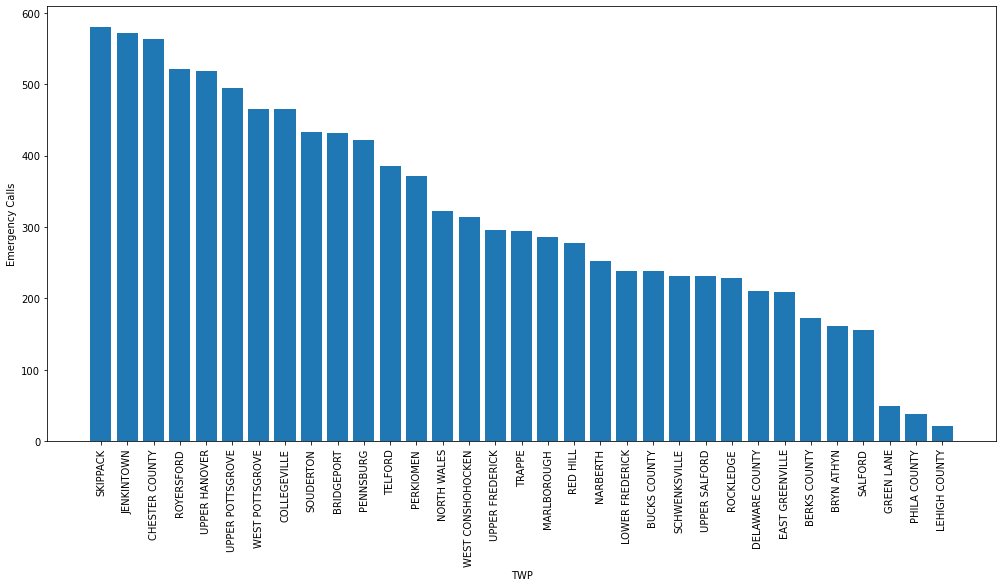

In [29]:
plt.figure(figsize = (17,8))
plt.bar(sorted_twp[34:68].index, sorted_twp[34:68].e);
plt.xticks(rotation = 90);
plt.xlabel('TWP');
plt.ylabel('Emergency Calls');